# Introduction 2

## Introduction to Model Appropriateness

One of the key themes of this ExPra will be the idea of **model appropriateness**. In this example, we briefly consider sine waves. Sine waves are very relevant to much of Psychology and Neuroscience - for example in describing [neural oscillations](https://en.wikipedia.org/wiki/Neural_oscillation).

We'll show that a simple linear model is inappropriate for describing the data, but that a more appropriate model can describe these data much better.

### 1: Generate the Data

First of all, we need to generate the data we will use. We will also be using the packages `tibble` and `ggplot2`, so make sure these are loaded!

In [94]:
# load libraries used in the examples
library(tibble)
library(ggplot2)

# set the ggplot2 theme
theme_set(theme_classic())

# set a seed for reproducibility
set.seed(999)

Here we generate 250 observations from a Sine wave, with amplitude of 3.7 and with normally distributed noise of SD=1. We'll also offset the sine wave from 0, by 2.3.

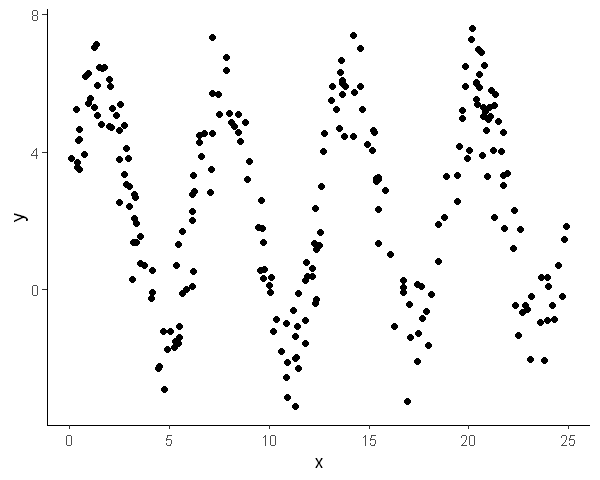

In [95]:
n <- 250  # number of observations
amplitude <- 3.7  # amplitude of the sine wave
offset <- 2.3  # offset from 0
noise_sd <- 1  # SD of noise

data <- tibble(
  # randomly sample x values from 0 to 25
  x = runif(n=n, min=0, max=25),
  # generate the perfect sine wave
  s = offset + amplitude * sin(x),
  # generate random noise of desired sd
  e = rnorm(n=n, mean=0, sd=noise_sd),
  # add the sine wave to the noise to simulate observations
  y = s + e
)

# plot the observations
ggplot(data, aes(x, y)) +
  geom_point()

This shows that the pattern is clearly non-random - there is an obvious relationship between x and y.

### 2: Try a Simple Linear Model / Pearson Correlation

Let's get the Pearson correlation coefficient for our data.

In [96]:
# get the Pearson's correlation
cor(data$x, data$y)

[1] -0.09210772

The Pearson's correlation is very close to zero - why do you think that is?

The Pearson's correlation is based on a linear model. Here is what that looks like using the `lm()` function:

In [97]:
lm(y ~ x, data=data)


Call:
lm(formula = y ~ x, data = data)

Coefficients:
(Intercept)            x  
    2.99752     -0.03492  


The `Intercept` has very roughly estimated our `offset` of 3.7, estimating it equal about 3. `x` is an estimate for a linear slope.

To better understand this, we can also visualise the linear relationship that the Pearson's correlation is based on...

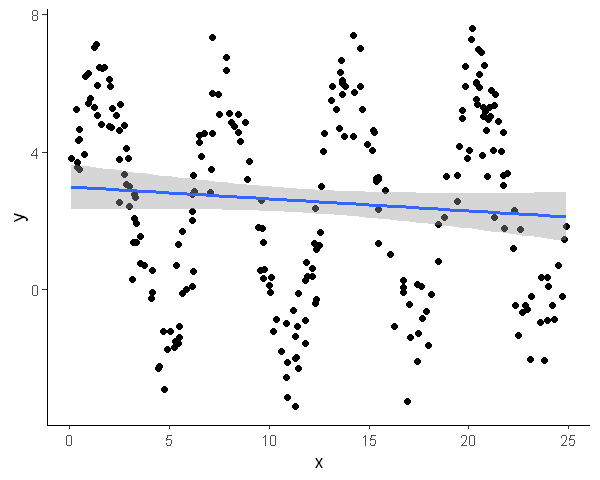

In [98]:
# superimpose the simple linear model
ggplot(data, aes(x, y)) +
  geom_point() +
  geom_smooth(method="lm", formula=y~x)

Clearly, a simple Pearson's correlation, and the associated simple linear model, are completely inappropriate in this case! It's missing important information that we know about the data.

### 3: Fit a more Appropriate Model

If we happen know that a the data is generated from a sine wave with a certain amplitude (and zero phase), we could fit a model that accounts for this. Here, instead of `y ~ x`, our formula would be `y ~ sin(x)`

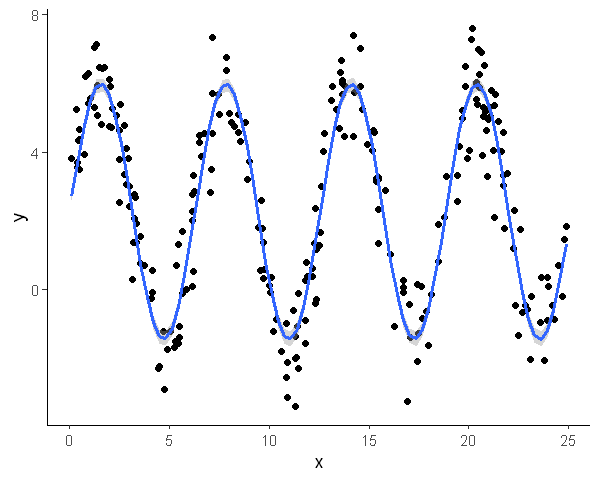

In [99]:
ggplot(data, aes(x, y)) +
  geom_point() +
  geom_smooth(method="lm", formula = y ~ sin(x))

This is looking like a much better description of the data!

Here is what the `lm()` output looks like.

In [100]:
lm(y ~ sin(x), data=data)


Call:
lm(formula = y ~ sin(x), data = data)

Coefficients:
(Intercept)       sin(x)  
      2.278        3.711  


How cool! Notice that this model is now able to estimate our parameters from before!

* The `Intercept` estimates our offset parameter of 2.3
* The `sin(x)` part estimates our amplitude of 3.7

If we wanted to, we could also calculate an equivalent of the Pearson's correlation for this more appropriate model, which is much better at capturing the strength of the clear relationship that we can see in the data.

In [101]:
cor(sin(data$x), data$y)

[1] 0.9406735